# Malicious and Benign Websites Detection: A Data Mining and Machine Learning Approach

**Author:** Ivan Mijić
**Date:** March 27, 2024 - TBD
**Email:** ivan.mijic@stu.ibu.edu.ba

## Abstract

In today’s digital landscape, the proliferation of malicious websites represents a grave concern for online trust and security. This research paper delves into the usage of data science for the informational branch of cybersecurity, specifically focusing on the detection of malicious and benign websites using data mining and machine learning techniques. The primary aim is to develop accurate classification models capable of differentiating between malicious and benign URLs and potentially finding them in a dataset of healthy URLs. Leveraging a comprehensive dataset comprising attributes from web traffic layers, this study employs meticulous data pre-processing and model training to harness machine learning algorithms effectively. By exploring the intricate relationship between web traffic features and machine learning models, this research contributes to cybersecurity practices and offers insights into evolving online threats. The findings hold significance for enhancing threat detection mechanisms and fostering trust in digital environments.

---

## Introduction

In a period of informational modernity, where the internet is in the forefront of communication, commerce, and human interaction, the commonness of potentially malicious websites poses a significant threat to every internet user, business, and institution worldwide. The ever-increasing evolution speed of cyber threats demands more and more sophisticated methods for detection and mitigation. As such, the integration of machine learning strategies offers a promising solution for identifying and classifying malicious and benign websites efficiently and effectively.

The main objective of this research paper is to discern between malicious and benign websites, with the support of data mining and machine learning techniques and algorithms. By utilizing a diverse dataset that encompasses attributes from both the application and network layers of web traffic, the aim is to evaluate, analyze, and develop robust classification models capable of effectively identifying potentially harmful website URLs. This research paper seeks to address the challenge of automated website classification, contribute to the advancement of cybersecurity practices, and shed light on the latent risks inherent in a ubiquitous tool readily available to many individuals in their daily lives.

---

## Data Cleaning Steps (High-level overview for myself)

1. **Reading the File:**
   - Load the dataset into the programming environment.

2. **Familiarizing with the dataset:**
   - Observe the dataset from many different angles.

3. **Handling Missing Values:**
   - Identify and handle missing values by either removing rows/columns or imputing values.

4. **Data Formatting:**
   - Check and ensure consistent data types for each column (e.g., numeric, categorical).

5. **Removing Duplicates:**
   - Identify and remove duplicate rows from the dataset if present.

6. **Handling Outliers:**
   - Detect and address outliers by either removing them or transforming them.

7. **Feature Scaling:**
   - Normalize or standardize numerical features to bring them to a similar scale.
       
9. **Handling Categorical Variables:**
   - Encode categorical variables into numerical format using techniques like one-hot encoding.
        
8. **Feature Engineering:**
   - Create new features or modify existing ones to improve model performance.
         
13. **Final Check:**
    - Perform a final check to ensure the dataset is clean and ready for analysis.

## Imports

***pandas -> Python library used for working with data sets.***
***numpy -> Python library used for working with arrays.***
***sklearn -> Python library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.***
***matplotlib -> Python library for data visualization and graphical plotting.***

***enum***

In [441]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from enum import Enum

## Constants

***dataset_path -> relative path of the dataset***

In [442]:
dataset_path = './Data/dataset.csv'

class Columns(Enum):
    URL = "URL"
    URL_LENGTH = "URL_LENGTH"
    NUMBER_SPECIAL_CHARACTERS = "NUMBER_SPECIAL_CHARACTERS"
    CHARSET = "CHARSET"
    SERVER = "SERVER"
    CONTENT_LENGTH = "CONTENT_LENGTH"
    WHOIS_COUNTRY = "WHOIS_COUNTRY"
    WHOIS_STATEPRO = "WHOIS_STATEPRO"
    WHOIS_REGDATE = "WHOIS_REGDATE"
    WHOIS_UPDATED_DATE = "WHOIS_UPDATED_DATE"
    TCP_CONVERSATION_EXCHANGE = "TCP_CONVERSATION_EXCHANGE"
    DIST_REMOTE_TCP_PORT = "DIST_REMOTE_TCP_PORT"
    REMOTE_IPS = "REMOTE_IPS"
    APP_BYTES = "APP_BYTES"
    SOURCE_APP_PACKETS = "SOURCE_APP_PACKETS"
    REMOTE_APP_PACKETS = "REMOTE_APP_PACKETS"
    APP_PACKETS = "APP_PACKETS"
    DNS_QUERY_TIMES = "DNS_QUERY_TIMES"
    TYPE = "TYPE"

## 1. Reading the File:

In [443]:
df = pd.read_csv(dataset_path)

df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


## Familiarizing with the dataset:

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [445]:
num_records=len(df)

print(f'Total number of records: {num_records}')

Total number of records: 1781


In [446]:
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 1781
Total number of columns: 21


In [447]:
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1


In [448]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [449]:
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


## 1. Handling Missing Values:


### Definitions

In [450]:
def null_values(dataset):
    return dataset.isnull().sum().sort_values(ascending=False)

def null_values_perc(dataset):
    return ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending=False)

def impute(dataset, field, strategy: str = 'mean'):
    imputer=SimpleImputer(missing_values=np.nan, strategy=strategy)
    imputer=imputer.fit(pd.DataFrame(dataset[field]))
    dataset[field] = imputer.transform(pd.DataFrame(dataset[field]))
    dataset[field] = np.round(dataset[field])
    
    return dataset

def impute_dates_by_nearest(dataset, field):
    dataset[field] = pd.to_datetime(dataset[field], errors='coerce')
    dataset[field] = dataset[field].fillna(method='ffill')
    dataset[field] = dataset[field].fillna(method='bfill')

    return dataset

def create_new_category(dataset, field, category_name: str = 'Unknown'):
    dataset[field].fillna(category_name, inplace=True)
    return dataset

In [451]:
missing_values = null_values(df)

missing_values

CONTENT_LENGTH               812
WHOIS_STATEPRO               362
WHOIS_COUNTRY                306
SERVER                       176
WHOIS_UPDATED_DATE           139
WHOIS_REGDATE                127
CHARSET                        7
DNS_QUERY_TIMES                1
URL                            0
SOURCE_APP_PACKETS             0
APP_PACKETS                    0
REMOTE_APP_BYTES               0
SOURCE_APP_BYTES               0
REMOTE_APP_PACKETS             0
TCP_CONVERSATION_EXCHANGE      0
APP_BYTES                      0
REMOTE_IPS                     0
DIST_REMOTE_TCP_PORT           0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
Type                           0
dtype: int64

In [452]:
missing_percent = null_values_perc(df)
missing_percent

CONTENT_LENGTH               45.592364
WHOIS_STATEPRO               20.325660
WHOIS_COUNTRY                17.181359
SERVER                        9.882089
WHOIS_UPDATED_DATE            7.804604
WHOIS_REGDATE                 7.130825
CHARSET                       0.393038
DNS_QUERY_TIMES               0.056148
URL                           0.000000
SOURCE_APP_PACKETS            0.000000
APP_PACKETS                   0.000000
REMOTE_APP_BYTES              0.000000
SOURCE_APP_BYTES              0.000000
REMOTE_APP_PACKETS            0.000000
TCP_CONVERSATION_EXCHANGE     0.000000
APP_BYTES                     0.000000
REMOTE_IPS                    0.000000
DIST_REMOTE_TCP_PORT          0.000000
URL_LENGTH                    0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
Type                          0.000000
dtype: float64

In [453]:
df2 = df.drop(Columns.CONTENT_LENGTH.value, axis=1) # It would have been interesting to see how content length impacts the URL health, but it is probably too low in non-missing values

missing_values = null_values_perc(df2)

missing_values

WHOIS_STATEPRO               20.325660
WHOIS_COUNTRY                17.181359
SERVER                        9.882089
WHOIS_UPDATED_DATE            7.804604
WHOIS_REGDATE                 7.130825
CHARSET                       0.393038
DNS_QUERY_TIMES               0.056148
URL                           0.000000
SOURCE_APP_PACKETS            0.000000
APP_PACKETS                   0.000000
REMOTE_APP_BYTES              0.000000
SOURCE_APP_BYTES              0.000000
REMOTE_APP_PACKETS            0.000000
DIST_REMOTE_TCP_PORT          0.000000
APP_BYTES                     0.000000
REMOTE_IPS                    0.000000
URL_LENGTH                    0.000000
TCP_CONVERSATION_EXCHANGE     0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
Type                          0.000000
dtype: float64

In [454]:
df2.WHOIS_COUNTRY

0       NaN
1       NaN
2       NaN
3        US
4        US
       ... 
1776     ES
1777     ES
1778     US
1779     US
1780     US
Name: WHOIS_COUNTRY, Length: 1781, dtype: object

In [455]:
df2.WHOIS_STATEPRO

0             NaN
1             NaN
2             NaN
3              AK
4              TX
          ...    
1776    Barcelona
1777    Barcelona
1778           FL
1779           CA
1780    Wisconsin
Name: WHOIS_STATEPRO, Length: 1781, dtype: object

In [456]:
df2 = create_new_category(df2, Columns.WHOIS_COUNTRY.value)
df2 = create_new_category(df2, Columns.WHOIS_STATEPRO.value)
df2 = create_new_category(df2, Columns.SERVER.value)

missing_values = null_values_perc(df2)

missing_values

WHOIS_UPDATED_DATE           7.804604
WHOIS_REGDATE                7.130825
CHARSET                      0.393038
DNS_QUERY_TIMES              0.056148
URL                          0.000000
APP_BYTES                    0.000000
APP_PACKETS                  0.000000
REMOTE_APP_BYTES             0.000000
SOURCE_APP_BYTES             0.000000
REMOTE_APP_PACKETS           0.000000
SOURCE_APP_PACKETS           0.000000
DIST_REMOTE_TCP_PORT         0.000000
REMOTE_IPS                   0.000000
URL_LENGTH                   0.000000
TCP_CONVERSATION_EXCHANGE    0.000000
WHOIS_STATEPRO               0.000000
WHOIS_COUNTRY                0.000000
SERVER                       0.000000
NUMBER_SPECIAL_CHARACTERS    0.000000
Type                         0.000000
dtype: float64

In [457]:
df2 = impute_dates_by_nearest(df2, Columns.WHOIS_REGDATE.value)
df2 = impute_dates_by_nearest(df2, Columns.WHOIS_UPDATED_DATE.value)

missing_values = null_values_perc(df2)

missing_values

CHARSET                      0.393038
DNS_QUERY_TIMES              0.056148
URL                          0.000000
REMOTE_IPS                   0.000000
APP_PACKETS                  0.000000
REMOTE_APP_BYTES             0.000000
SOURCE_APP_BYTES             0.000000
REMOTE_APP_PACKETS           0.000000
SOURCE_APP_PACKETS           0.000000
APP_BYTES                    0.000000
DIST_REMOTE_TCP_PORT         0.000000
URL_LENGTH                   0.000000
TCP_CONVERSATION_EXCHANGE    0.000000
WHOIS_UPDATED_DATE           0.000000
WHOIS_REGDATE                0.000000
WHOIS_STATEPRO               0.000000
WHOIS_COUNTRY                0.000000
SERVER                       0.000000
NUMBER_SPECIAL_CHARACTERS    0.000000
Type                         0.000000
dtype: float64

In [458]:
df2.dropna(subset=[Columns.CHARSET.value, Columns.DNS_QUERY_TIMES.value], inplace=True)

missing_values = null_values_perc(df2)

missing_values

URL                          0.0
URL_LENGTH                   0.0
DNS_QUERY_TIMES              0.0
APP_PACKETS                  0.0
REMOTE_APP_BYTES             0.0
SOURCE_APP_BYTES             0.0
REMOTE_APP_PACKETS           0.0
SOURCE_APP_PACKETS           0.0
APP_BYTES                    0.0
REMOTE_IPS                   0.0
DIST_REMOTE_TCP_PORT         0.0
TCP_CONVERSATION_EXCHANGE    0.0
WHOIS_UPDATED_DATE           0.0
WHOIS_REGDATE                0.0
WHOIS_STATEPRO               0.0
WHOIS_COUNTRY                0.0
SERVER                       0.0
CHARSET                      0.0
NUMBER_SPECIAL_CHARACTERS    0.0
Type                         0.0
dtype: float64

## Data Formatting

### Definitions

In [459]:
def convert_to_categorical(dataset, columns):
    for col in columns:
        dataset[col] = dataset[col].astype('category')
    return dataset

def parse_datetime_columns(dataset, columns):
    for col in columns:
        dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
    return dataset

def optimize_memory_usage(dataset):
    int_columns = dataset.select_dtypes(include='int64').columns
    for col in int_columns:
        dataset[col] = pd.to_numeric(dataset[col], downcast='integer')
    return dataset

def check_data_consistency(dataset):
    for col in dataset.columns:
        print(f"Column: {col}")
        print(dataset[col].value_counts())
        print("----------------------------")

def format_data(dataset, categorical_columns, datetime_columns):
    dataset = convert_to_categorical(dataset, categorical_columns)
    dataset = parse_datetime_columns(dataset, datetime_columns)
    dataset = optimize_memory_usage(dataset)
    check_data_consistency(dataset)
    
    return dataset

In [460]:
data_types = df2.dtypes

data_types

URL                                  object
URL_LENGTH                            int64
NUMBER_SPECIAL_CHARACTERS             int64
CHARSET                              object
SERVER                               object
WHOIS_COUNTRY                        object
WHOIS_STATEPRO                       object
WHOIS_REGDATE                datetime64[ns]
WHOIS_UPDATED_DATE           datetime64[ns]
TCP_CONVERSATION_EXCHANGE             int64
DIST_REMOTE_TCP_PORT                  int64
REMOTE_IPS                            int64
APP_BYTES                             int64
SOURCE_APP_PACKETS                    int64
REMOTE_APP_PACKETS                    int64
SOURCE_APP_BYTES                      int64
REMOTE_APP_BYTES                      int64
APP_PACKETS                           int64
DNS_QUERY_TIMES                     float64
Type                                  int64
dtype: object

In [461]:
categorical_columns = [Columns.URL.value, Columns.CHARSET.value, Columns.SERVER.value, Columns.WHOIS_COUNTRY.value, Columns.WHOIS_STATEPRO.value]
datetime_columns = [Columns.WHOIS_REGDATE.value, Columns.WHOIS_UPDATED_DATE.value]

formatted_df = format_data(df2, categorical_columns, datetime_columns)

formatted_df.dtypes

Column: URL
URL
B0_1       1
B0_610     1
B0_621     1
B0_620     1
B0_62      1
          ..
B0_2110    1
B0_211     1
B0_2109    1
B0_2108    1
M4_9       1
Name: count, Length: 1773, dtype: int64
----------------------------
Column: URL_LENGTH
URL_LENGTH
39     86
40     48
46     44
42     43
38     43
       ..
134     1
131     1
107     1
128     1
249     1
Name: count, Length: 142, dtype: int64
----------------------------
Column: NUMBER_SPECIAL_CHARACTERS
NUMBER_SPECIAL_CHARACTERS
9     274
8     211
11    206
10    198
7     159
6     144
12    134
13     92
14     57
15     49
17     42
20     41
16     35
19     27
18     26
21     14
22     10
23     10
24      7
25      7
26      7
27      6
29      4
34      3
5       2
28      2
31      2
36      1
30      1
43      1
40      1
Name: count, dtype: int64
----------------------------
Column: CHARSET
CHARSET
UTF-8           675
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
ISO-8859       

URL                                category
URL_LENGTH                            int16
NUMBER_SPECIAL_CHARACTERS              int8
CHARSET                            category
SERVER                             category
WHOIS_COUNTRY                      category
WHOIS_STATEPRO                     category
WHOIS_REGDATE                datetime64[ns]
WHOIS_UPDATED_DATE           datetime64[ns]
TCP_CONVERSATION_EXCHANGE             int16
DIST_REMOTE_TCP_PORT                  int16
REMOTE_IPS                             int8
APP_BYTES                             int32
SOURCE_APP_PACKETS                    int16
REMOTE_APP_PACKETS                    int16
SOURCE_APP_BYTES                      int32
REMOTE_APP_BYTES                      int32
APP_PACKETS                           int16
DNS_QUERY_TIMES                     float64
Type                                   int8
dtype: object

In [462]:
df3 = formatted_df

df3

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Unknown,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,1997-08-01 00:00:00,2016-02-09 00:00:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,1997-08-01 00:00:00,2016-02-09 00:00:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,1997-08-01 00:00:00,2016-02-09 00:00:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1998-01-04 00:00:00,2016-09-12 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0


## Removing Duplicates:

In [463]:
df3.duplicated().any()

False

## Handling Outliers:

### Definitions

In [464]:
def detect_outliers_zscore(dataset, threshold=3):
    numerical_columns = dataset.select_dtypes(include=['int16', 'int8']).columns
    outliers = {}
    for col in numerical_columns:
        z_scores = np.abs((dataset[col] - np.mean(dataset[col])) / np.std(dataset[col]))
        outliers[col] = z_scores > threshold
    return pd.DataFrame(outliers)

def plot_histogram(data):
    plt.hist(data, bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.show()

def plot_boxplot(data):
    plt.boxplot(data)
    plt.xlabel('Data')
    plt.ylabel('Value')
    plt.title('Box Plot of Data')
    plt.show()

def plot_scatterplot(x, y):
    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot')
    plt.show()

def plot_numerical_columns(dataset):
    numerical_columns = dataset.select_dtypes(include=['int16', 'int8']).columns
    for col in numerical_columns:
        print(f'Column: {col}')
        plot_boxplot(dataset[col])
        plot_histogram(dataset[col])

Column: URL_LENGTH


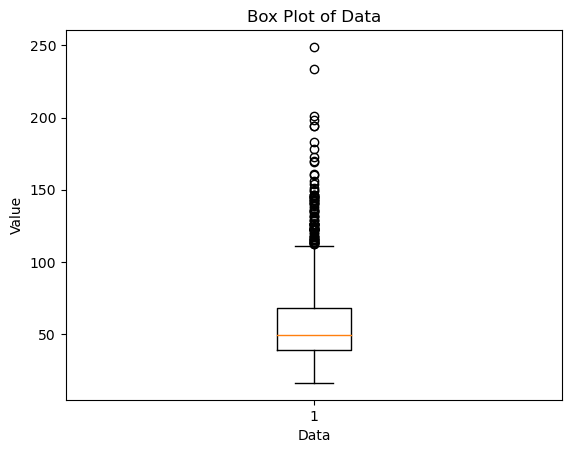

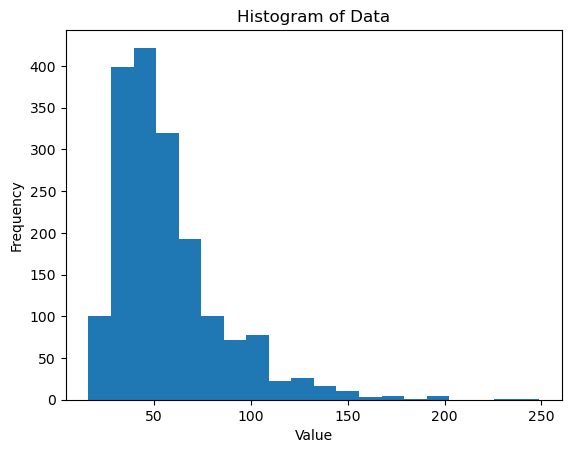

Column: NUMBER_SPECIAL_CHARACTERS


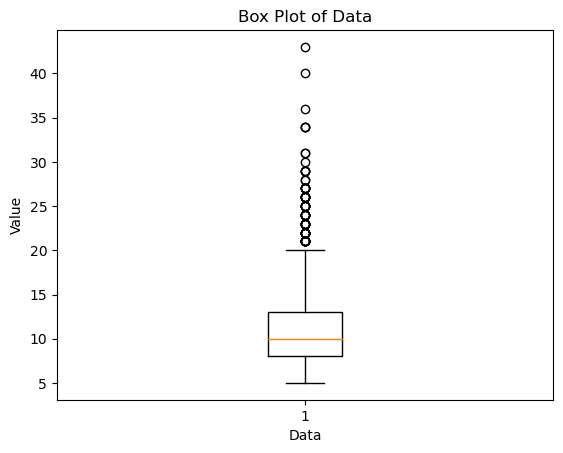

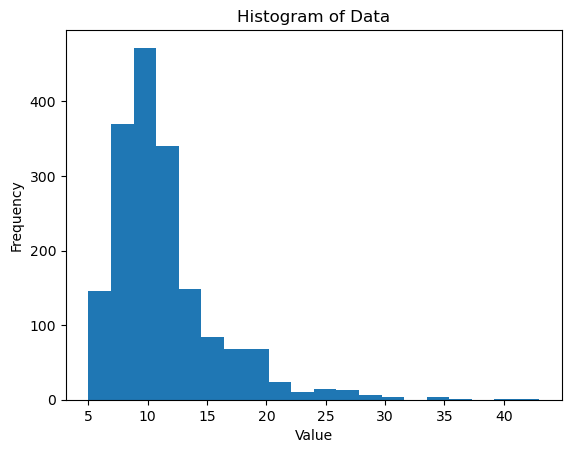

Column: TCP_CONVERSATION_EXCHANGE


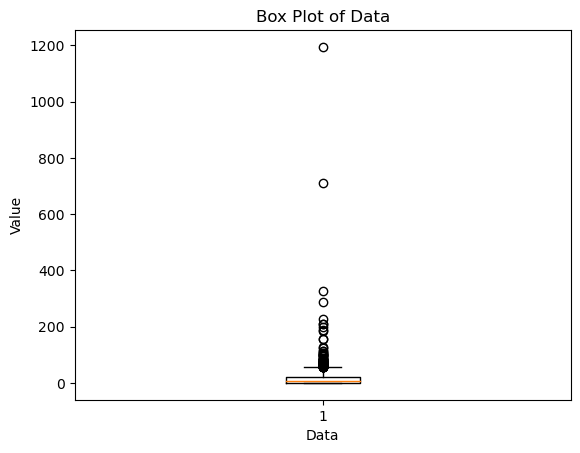

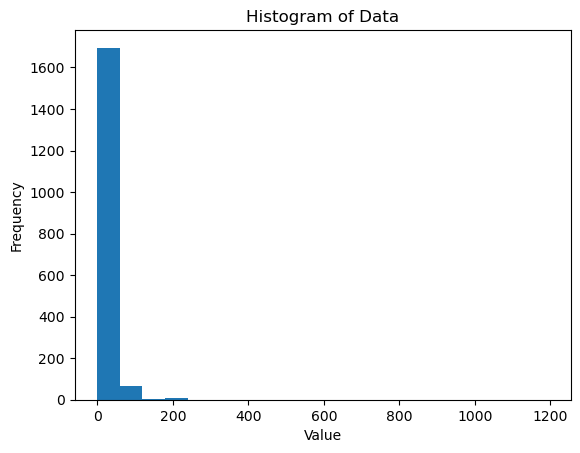

Column: DIST_REMOTE_TCP_PORT


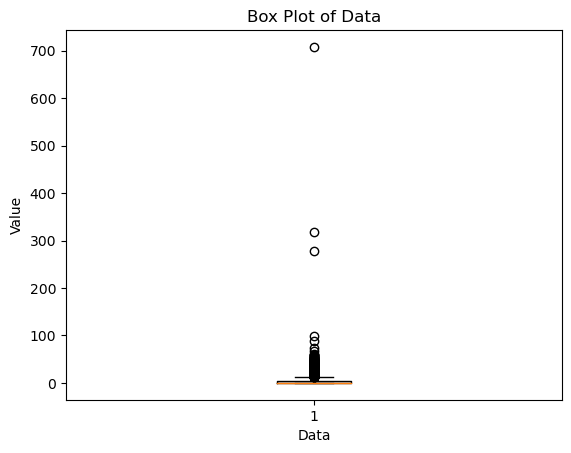

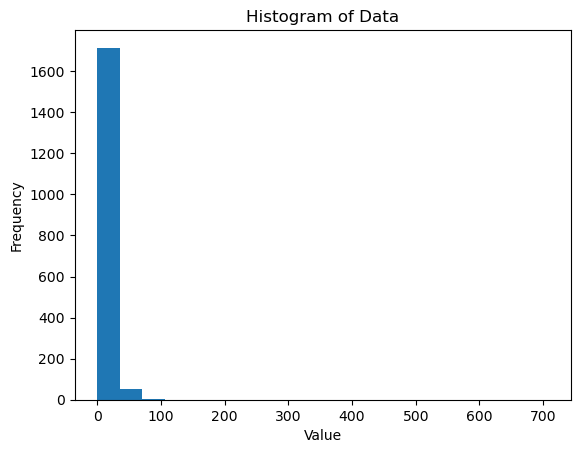

Column: REMOTE_IPS


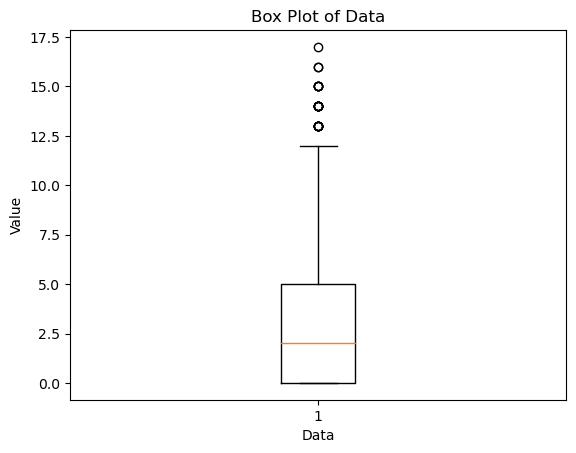

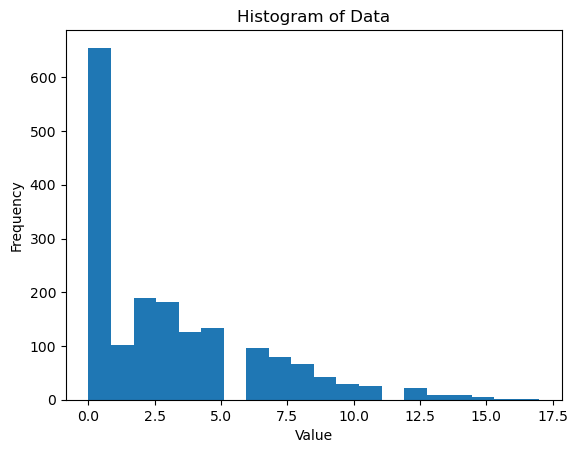

Column: SOURCE_APP_PACKETS


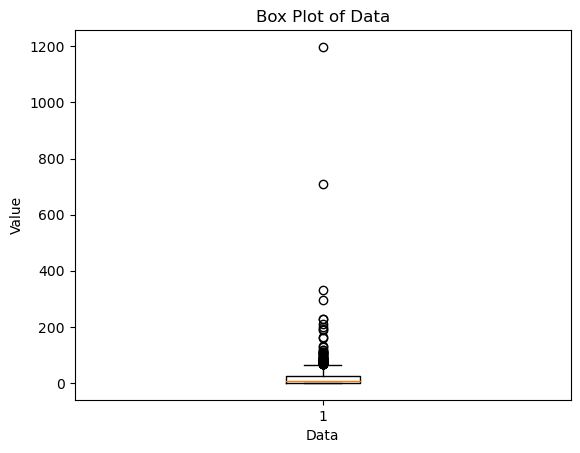

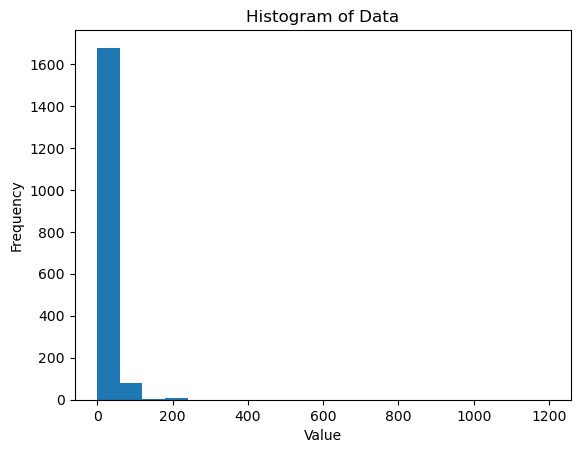

Column: REMOTE_APP_PACKETS


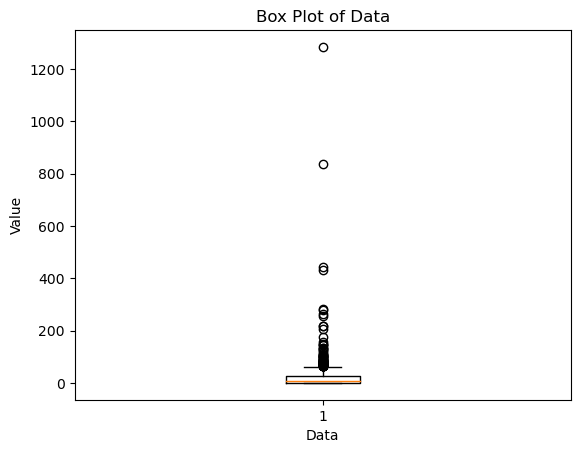

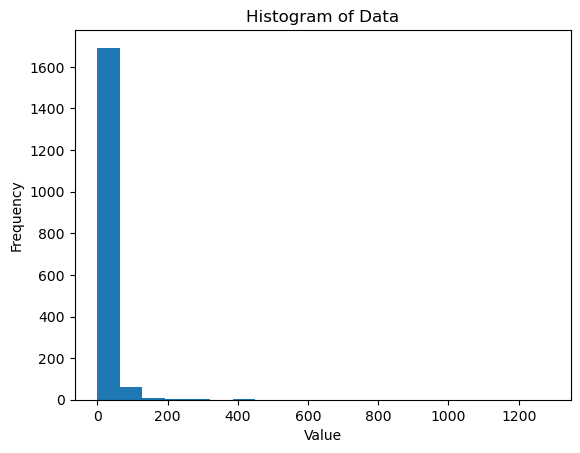

Column: APP_PACKETS


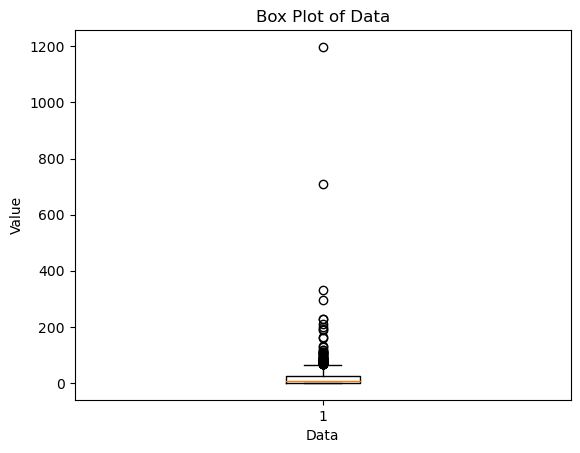

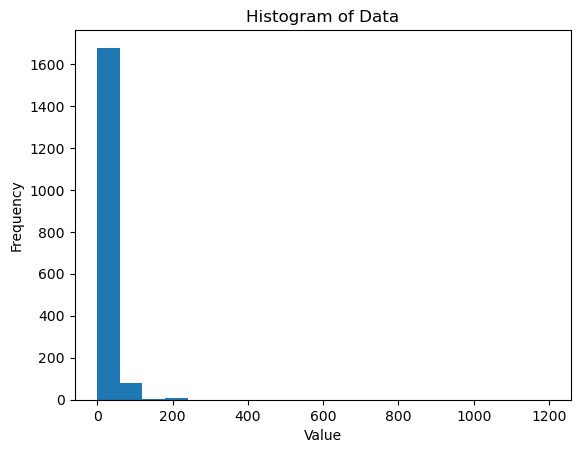

Column: Type


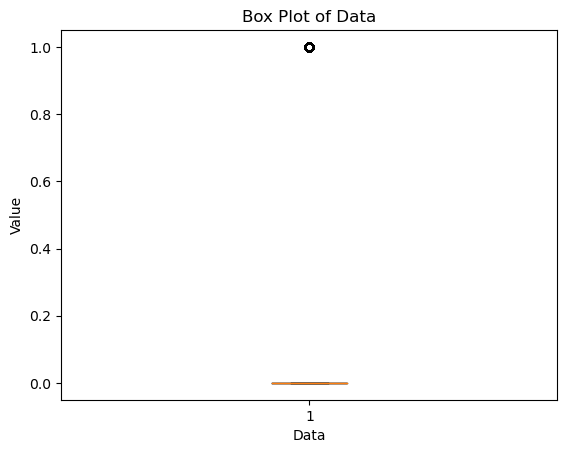

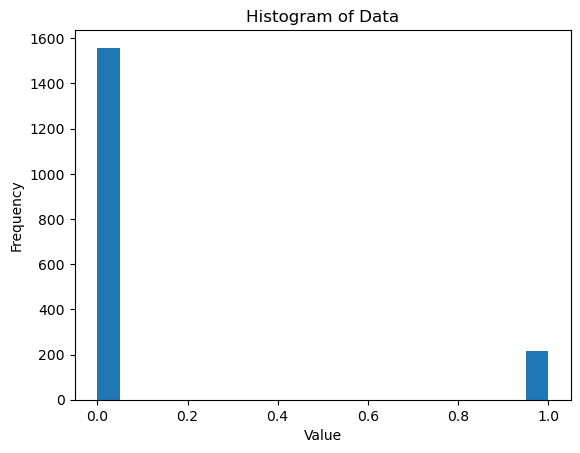

In [465]:
plot_numerical_columns(df3)

In [466]:
outliers_df = detect_outliers_zscore(df3)

outliers_df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,APP_PACKETS,Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1776,True,False,False,False,False,False,False,False,False
1777,True,False,False,False,False,False,False,False,False
1778,True,True,False,False,False,False,False,False,False
1779,True,True,False,False,False,False,False,False,False


In [467]:
outliers_indices = outliers_df.any(axis=1)  
outliers_data = df3[outliers_indices]

print(outliers_data)

# I currently need more research on my data, I have a feeling that the outliers will be important

          URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
41     B0_622          23                          6  ISO-8859-1   
56     B0_656          24                          6       UTF-8   
99     B0_362          27                          6       UTF-8   
134   B0_2089          29                          7       UTF-8   
162    B0_348          30                          6    us-ascii   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER WHOIS_COUNTRY WHOIS_STATEPRO WHOIS_REGDATE  \
41                    Apache            CA             AB    1997-04-02   
56                    Apache     

## Feature Scaling:

### Definitions


In [468]:
def scale_with_standard_scaler(dataset, columns):
    scaler = StandardScaler()
    df_scaled = dataset.copy()
    df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    return df_scaled

def normalize_with_minmax_scaler(dataset, columns):
    scaler = MinMaxScaler()
    df_normalized = dataset.copy()
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    return df_normalized

In [469]:
normalized_df = normalize_with_minmax_scaler(df3, [Columns.URL_LENGTH.value, Columns.NUMBER_SPECIAL_CHARACTERS.value, Columns.TCP_CONVERSATION_EXCHANGE.value,Columns.DIST_REMOTE_TCP_PORT.value, Columns.REMOTE_IPS.value, Columns.APP_PACKETS.value, Columns.SOURCE_APP_PACKETS.value, Columns.REMOTE_APP_PACKETS.value])

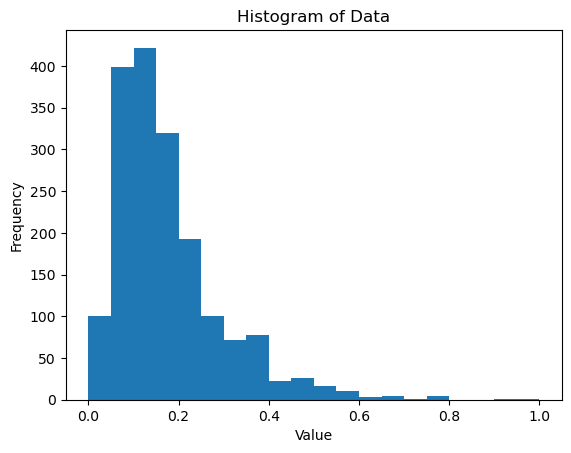

In [470]:
plot_histogram(normalized_df.URL_LENGTH)

## Handling categorical values:

### Definitions

In [471]:
def label_encode_categorical_columns(dataset, columns):
    le = LabelEncoder()
    df_encoded = dataset.copy()
    for col in columns:
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].astype('category')
            df_encoded[col] = le.fit_transform(df_encoded[col])  
    return df_encoded

def one_hot_encode_categorical(dataset, columns):
    df_encoded = dataset.copy()
    df_encoded = pd.get_dummies(df_encoded, columns=columns, drop_first=True)
    return df_encoded

In [472]:
df4 = normalized_df

df4

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,0.000000,0.052632,iso-8859-1,nginx,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,0.005863,0.000000,0.117647,700,0.007513,0.007788,1153,832,0.007513,2.0,1
1,B0_2314,0.000000,0.026316,UTF-8,Apache/2.4.10,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,0.014238,0.009887,0.235294,1230,0.014190,0.014798,1265,1230,0.014190,0.0,0
2,B0_911,0.000000,0.026316,us-ascii,Microsoft-HTTPAPI/2.0,Unknown,Unknown,2015-10-10 18:21:00,2013-12-09 00:45:00,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.0,0
3,B0_113,0.004292,0.026316,ISO-8859-1,nginx,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,0.025963,0.031073,0.176471,3812,0.032554,0.028816,18784,4380,0.032554,8.0,0
4,B0_403,0.004292,0.026316,UTF-8,Unknown,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,0.047739,0.002825,0.294118,4278,0.050918,0.048287,129889,4586,0.050918,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,0.763948,0.289474,UTF-8,Apache,ES,Barcelona,1997-08-01 00:00:00,2016-02-09 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.002336,186,0,0.000000,0.0,1
1777,M4_41,0.781116,0.315789,UTF-8,Apache,ES,Barcelona,1997-08-01 00:00:00,2016-02-09 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.001558,124,0,0.000000,0.0,1
1778,B0_162,0.793991,0.763158,utf-8,Apache/2.2.16 (Debian),US,FL,1997-08-01 00:00:00,2016-02-09 00:00:00,0.069514,0.002825,0.352941,6631,0.072621,0.069315,132181,6945,0.072621,4.0,0
1779,B0_1152,0.935622,0.763158,ISO-8859-1,cloudflare-nginx,US,CA,1998-01-04 00:00:00,2016-09-12 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.0,0


In [473]:
df4.dtypes

URL                                category
URL_LENGTH                          float64
NUMBER_SPECIAL_CHARACTERS           float64
CHARSET                            category
SERVER                             category
WHOIS_COUNTRY                      category
WHOIS_STATEPRO                     category
WHOIS_REGDATE                datetime64[ns]
WHOIS_UPDATED_DATE           datetime64[ns]
TCP_CONVERSATION_EXCHANGE           float64
DIST_REMOTE_TCP_PORT                float64
REMOTE_IPS                          float64
APP_BYTES                             int32
SOURCE_APP_PACKETS                  float64
REMOTE_APP_PACKETS                  float64
SOURCE_APP_BYTES                      int32
REMOTE_APP_BYTES                      int32
APP_PACKETS                         float64
DNS_QUERY_TIMES                     float64
Type                                   int8
dtype: object

In [474]:
df4 = label_encode_categorical_columns(df4, [Columns.CHARSET.value, Columns.SERVER.value, Columns.WHOIS_COUNTRY.value, Columns.WHOIS_STATEPRO.value])

df4

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,0.000000,0.052632,3,199,44,144,2015-10-10 18:21:00,2013-12-09 00:45:00,0.005863,0.000000,0.117647,700,0.007513,0.007788,1153,832,0.007513,2.0,1
1,B0_2314,0.000000,0.026316,2,61,44,144,2015-10-10 18:21:00,2013-12-09 00:45:00,0.014238,0.009887,0.235294,1230,0.014190,0.014798,1265,1230,0.014190,0.0,0
2,B0_911,0.000000,0.026316,4,114,44,144,2015-10-10 18:21:00,2013-12-09 00:45:00,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.0,0
3,B0_113,0.004292,0.026316,1,199,41,4,1997-07-10 04:00:00,2013-12-09 00:45:00,0.025963,0.031073,0.176471,3812,0.032554,0.028816,18784,4380,0.032554,8.0,0
4,B0_403,0.004292,0.026316,2,139,41,135,1996-12-05 00:00:00,2017-11-04 00:00:00,0.047739,0.002825,0.294118,4278,0.050918,0.048287,129889,4586,0.050918,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,0.763948,0.289474,2,7,13,17,1997-08-01 00:00:00,2016-02-09 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.002336,186,0,0.000000,0.0,1
1777,M4_41,0.781116,0.315789,2,7,13,17,1997-08-01 00:00:00,2016-02-09 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.001558,124,0,0.000000,0.0,1
1778,B0_162,0.793991,0.763158,5,31,41,34,1997-08-01 00:00:00,2016-02-09 00:00:00,0.069514,0.002825,0.352941,6631,0.072621,0.069315,132181,6945,0.072621,4.0,0
1779,B0_1152,0.935622,0.763158,1,147,41,20,1998-01-04 00:00:00,2016-09-12 00:00:00,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0.0,0


In [475]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

## Feature Engineering

### Definitions

In [476]:
def extract_date_features(dataset, date_columns):
    df_with_date_features = dataset.copy()
    for column in date_columns:
        df_with_date_features[column + '_year'] = df_with_date_features[column].dt.year
        df_with_date_features[column + '_month'] = df_with_date_features[column].dt.month
        df_with_date_features[column + '_day'] = df_with_date_features[column].dt.day
        # df_with_date_features[column + '_hour'] = df_with_date_features[column].dt.hour
        # df_with_date_features[column + '_minute'] = df_with_date_features[column].dt.minute
        # df_with_date_features[column + '_second'] = df_with_date_features[column].dt.second
    return df_with_date_features

def drop_original_date_columns(dataset, date_columns):
    df_without_original_dates = dataset.drop(columns=date_columns)
    return df_without_original_dates

In [477]:
df5 = extract_date_features(df4, [Columns.WHOIS_UPDATED_DATE.value, Columns.WHOIS_REGDATE.value])
df5 = drop_original_date_columns(df5, [Columns.WHOIS_UPDATED_DATE.value, Columns.WHOIS_REGDATE.value])

## Final Check:

I do understand that I probably made mistakes, so I will leave the check for a future review, when I am less sleep deprived.
I left the URL intentionally untransformed, because I plan for that to be my main label. 

In [478]:
df5

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,...,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,WHOIS_UPDATED_DATE_year,WHOIS_UPDATED_DATE_month,WHOIS_UPDATED_DATE_day,WHOIS_REGDATE_year,WHOIS_REGDATE_month,WHOIS_REGDATE_day
0,M0_109,0.000000,0.052632,3,199,44,144,0.005863,0.000000,0.117647,...,832,0.007513,2.0,1,2013,12,9,2015,10,10
1,B0_2314,0.000000,0.026316,2,61,44,144,0.014238,0.009887,0.235294,...,1230,0.014190,0.0,0,2013,12,9,2015,10,10
2,B0_911,0.000000,0.026316,4,114,44,144,0.000000,0.000000,0.000000,...,0,0.000000,0.0,0,2013,12,9,2015,10,10
3,B0_113,0.004292,0.026316,1,199,41,4,0.025963,0.031073,0.176471,...,4380,0.032554,8.0,0,2013,12,9,1997,7,10
4,B0_403,0.004292,0.026316,2,139,41,135,0.047739,0.002825,0.294118,...,4586,0.050918,4.0,0,2017,11,4,1996,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,0.763948,0.289474,2,7,13,17,0.000000,0.000000,0.000000,...,0,0.000000,0.0,1,2016,2,9,1997,8,1
1777,M4_41,0.781116,0.315789,2,7,13,17,0.000000,0.000000,0.000000,...,0,0.000000,0.0,1,2016,2,9,1997,8,1
1778,B0_162,0.793991,0.763158,5,31,41,34,0.069514,0.002825,0.352941,...,6945,0.072621,4.0,0,2016,2,9,1997,8,1
1779,B0_1152,0.935622,0.763158,1,147,41,20,0.000000,0.000000,0.000000,...,0,0.000000,0.0,0,2016,9,12,1998,1,4
